**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-773bc05a73a7>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

**Loading DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seed = 42

In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/1st May Final Sem Thesis/AnuK.Dataset_DTR.xlsx")
df

,MIC_Value,pMIC,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSCi,ATSC1i,ATSC2i,ATSC3i,...,topoRadius,topoDiameter,topoShape,GGI1,GGI4,GGI9,GGI1.1,JGI2,JGI5,JGI6
0,4.88,5.311580,2.713936,-1.357976,-2.842686,-8.485589,136.893222,3.686241,59.526110,-4.434430,...,6,11,0.833333,7.0,2.488889,0.34500,0.123967,0.858586,0.277778,0.213244
1,1250.00,2.903090,4.472814,-1.786436,-7.336737,-5.487125,136.893222,3.686241,59.526110,-42.622130,...,5,1,1.000000,6.5,2.328889,0.21375,0.493827,0.999910,0.373286,0.238864
2,156.20,3.806319,3.455816,-3.258135,-4.219486,-1.813475,137.621940,5.611987,57.444128,-44.115836,...,7,13,0.857143,7.0,2.151111,0.35375,0.222834,0.938272,0.324747,0.183285
3,2.44,5.612610,2.228257,-1.526253,-4.611296,-6.376696,137.621940,5.611987,57.444128,-44.115836,...,6,12,1.000000,7.0,2.248889,0.31375,0.265954,0.888889,0.277778,0.189274
4,9.76,5.010550,3.952818,-1.918625,-8.828588,-4.747844,137.621940,5.611987,57.444128,-46.335366,...,6,11,0.833333,6.5,2.168889,0.32500,0.131925,0.938272,0.379711,0.224830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1.22,5.913640,-1.625537,-5.388376,1.491324,6.348737,67.261521,-16.427943,1.757500,15.224762,...,7,13,0.857143,4.5,2.133333,0.21000,0.119784,0.846568,0.297679,0.193926
93,1.22,5.913640,-1.464527,-2.454978,-0.779562,2.132693,67.261521,-16.427943,1.757500,15.224762,...,7,14,1.000000,4.5,2.533333,0.19250,0.127845,0.899479,0.355556,0.216645
94,19.53,4.709298,-2.887595,-5.377681,3.315772,6.145770,68.329789,-19.799964,4.928696,21.584175,...,7,13,0.857143,4.0,2.173333,0.26000,0.148658,0.878553,0.268875,0.275586
95,1.22,5.913640,-2.196939,-3.393158,0.259497,3.117740,68.329789,-19.799964,4.928696,21.565829,...,7,14,1.000000,4.5,2.173333,0.21000,0.152842,0.826873,0.297881,0.179329


In [ ]:
print(df.columns)

Index(['MIC_Value', 'pMIC', 'ATSC5p', 'ATSC6p', 'ATSC7p', 'ATSC8p', 'ATSCi',
       'ATSC1i', 'ATSC2i', 'ATSC3i', 'ATSC4i', 'ATSC5i', 'ATSC7i', 'ATSC8i',
       'ATSCs', 'ATSC1s', 'ATSC2s', 'ATSC3s', 'ATSC4s', 'ATSC5s', 'ATSC6s',
       'ATSC7s', 'ATSC8s', 'AATSC1c', 'AATSC2c', 'AATSC1m', 'AATSC2m',
       'AATSC3m', 'AATSC5p', 'AATSC2i', 'AATSC6i', 'GATS6c', 'GATS2m',
       'GATS6p', 'VE1_Dzi', 'SpMax1_Bhp', 'SpMax2_Bhp', 'Mp', 'RotBFrac',
       'nRotBt', 'RotBtFrac', 'LipinskiFailures', 'topoRadius', 'topoDiameter',
       'topoShape', 'GGI1', 'GGI4', 'GGI9', 'GGI1.1', 'JGI2', 'JGI5', 'JGI6'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MIC_Value         97 non-null     float64
 1   pMIC              97 non-null     float64
 2   ATSC5p            97 non-null     float64
 3   ATSC6p            97 non-null     float64
 4   ATSC7p            97 non-null     float64
 5   ATSC8p            97 non-null     float64
 6   ATSCi             97 non-null     float64
 7   ATSC1i            97 non-null     float64
 8   ATSC2i            97 non-null     float64
 9   ATSC3i            97 non-null     float64
 10  ATSC4i            97 non-null     float64
 11  ATSC5i            97 non-null     float64
 12  ATSC7i            97 non-null     float64
 13  ATSC8i            97 non-null     float64
 14  ATSCs             97 non-null     float64
 15  ATSC1s            97 non-null     float64
 16  ATSC2s            97 non-null     float64
 17 

**Checking for Null Values**

In [ ]:
df.isnull()

,MIC_Value,pMIC,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSCi,ATSC1i,ATSC2i,ATSC3i,...,topoRadius,topoDiameter,topoShape,GGI1,GGI4,GGI9,GGI1.1,JGI2,JGI5,JGI6
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

MIC_Value           0
pMIC                0
ATSC5p              0
ATSC6p              0
ATSC7p              0
ATSC8p              0
ATSCi               0
ATSC1i              0
ATSC2i              0
ATSC3i              0
ATSC4i              0
ATSC5i              0
ATSC7i              0
ATSC8i              0
ATSCs               0
ATSC1s              0
ATSC2s              0
ATSC3s              0
ATSC4s              0
ATSC5s              0
ATSC6s              0
ATSC7s              0
ATSC8s              0
AATSC1c             0
AATSC2c             0
AATSC1m             0
AATSC2m             0
AATSC3m             0
AATSC5p             0
AATSC2i             0
AATSC6i             0
GATS6c              0
GATS2m              0
GATS6p              0
VE1_Dzi             0
SpMax1_Bhp          0
SpMax2_Bhp          0
Mp                  0
RotBFrac            0
nRotBt              0
RotBtFrac           0
LipinskiFailures    0
topoRadius          0
topoDiameter        0
topoShape           0
GGI1      

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df2 = df.fillna(value = 0)
df2

,MIC_Value,pMIC,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSCi,ATSC1i,ATSC2i,ATSC3i,...,topoRadius,topoDiameter,topoShape,GGI1,GGI4,GGI9,GGI1.1,JGI2,JGI5,JGI6
0,4.88,5.311580,2.713936,-1.357976,-2.842686,-8.485589,136.893222,3.686241,59.526110,-4.434430,...,6,11,0.833333,7.0,2.488889,0.34500,0.123967,0.858586,0.277778,0.213244
1,1250.00,2.903090,4.472814,-1.786436,-7.336737,-5.487125,136.893222,3.686241,59.526110,-42.622130,...,5,1,1.000000,6.5,2.328889,0.21375,0.493827,0.999910,0.373286,0.238864
2,156.20,3.806319,3.455816,-3.258135,-4.219486,-1.813475,137.621940,5.611987,57.444128,-44.115836,...,7,13,0.857143,7.0,2.151111,0.35375,0.222834,0.938272,0.324747,0.183285
3,2.44,5.612610,2.228257,-1.526253,-4.611296,-6.376696,137.621940,5.611987,57.444128,-44.115836,...,6,12,1.000000,7.0,2.248889,0.31375,0.265954,0.888889,0.277778,0.189274
4,9.76,5.010550,3.952818,-1.918625,-8.828588,-4.747844,137.621940,5.611987,57.444128,-46.335366,...,6,11,0.833333,6.5,2.168889,0.32500,0.131925,0.938272,0.379711,0.224830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1.22,5.913640,-1.625537,-5.388376,1.491324,6.348737,67.261521,-16.427943,1.757500,15.224762,...,7,13,0.857143,4.5,2.133333,0.21000,0.119784,0.846568,0.297679,0.193926
93,1.22,5.913640,-1.464527,-2.454978,-0.779562,2.132693,67.261521,-16.427943,1.757500,15.224762,...,7,14,1.000000,4.5,2.533333,0.19250,0.127845,0.899479,0.355556,0.216645
94,19.53,4.709298,-2.887595,-5.377681,3.315772,6.145770,68.329789,-19.799964,4.928696,21.584175,...,7,13,0.857143,4.0,2.173333,0.26000,0.148658,0.878553,0.268875,0.275586
95,1.22,5.913640,-2.196939,-3.393158,0.259497,3.117740,68.329789,-19.799964,4.928696,21.565829,...,7,14,1.000000,4.5,2.173333,0.21000,0.152842,0.826873,0.297881,0.179329


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MIC_Value         97 non-null     float64
 1   pMIC              97 non-null     float64
 2   ATSC5p            97 non-null     float64
 3   ATSC6p            97 non-null     float64
 4   ATSC7p            97 non-null     float64
 5   ATSC8p            97 non-null     float64
 6   ATSCi             97 non-null     float64
 7   ATSC1i            97 non-null     float64
 8   ATSC2i            97 non-null     float64
 9   ATSC3i            97 non-null     float64
 10  ATSC4i            97 non-null     float64
 11  ATSC5i            97 non-null     float64
 12  ATSC7i            97 non-null     float64
 13  ATSC8i            97 non-null     float64
 14  ATSCs             97 non-null     float64
 15  ATSC1s            97 non-null     float64
 16  ATSC2s            97 non-null     float64
 17 

In [ ]:
df2.describe()

,MIC_Value,pMIC,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSCi,ATSC1i,ATSC2i,ATSC3i,...,topoRadius,topoDiameter,topoShape,GGI1,GGI4,GGI9,GGI1.1,JGI2,JGI5,JGI6
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,428.014124,4.004860,1.617148,-1.484326,-1.936495,-2.354489,65.105778,-3.075015,9.000664,-12.316912,...,6.154639,10.185567,0.895479,4.948454,2.011512,0.284332,0.258515,0.674487,0.298705,0.226913
std,481.040406,1.039166,2.393447,2.623008,2.941189,3.007744,34.873944,5.496575,22.372941,16.933121,...,0.916745,4.444870,0.093694,1.051993,0.362158,0.225663,0.225329,0.346635,0.044216,0.031853
min,1.220000,2.903090,-5.952195,-11.622395,-14.677110,-9.154846,5.124716,-19.799964,-21.756432,-55.964161,...,5.000000,1.000000,0.600000,1.000000,1.417778,0.000000,0.000000,0.111110,0.225694,0.155582
25%,19.530000,3.204120,1.146876,-2.777819,-3.195595,-3.896739,51.651836,-4.756848,-6.652377,-19.418552,...,6.000000,9.000000,0.833333,4.500000,1.782222,0.141250,0.127845,0.177442,0.263889,0.215781
50%,156.250000,3.806180,2.297642,-1.374453,-1.811143,-2.355524,55.478385,-2.463542,2.724297,-15.891491,...,6.000000,11.000000,0.857143,4.500000,1.911111,0.198125,0.214570,0.864198,0.286836,0.224663
75%,625.000000,4.709298,3.216311,0.194932,-0.497469,-0.567780,65.463169,-0.372391,17.618662,-1.971882,...,7.000000,13.000000,1.000000,5.500000,2.191111,0.336250,0.335785,0.935673,0.324747,0.239575
max,1250.000000,5.913640,5.684164,7.169876,5.826529,6.348737,179.913395,7.345649,59.526110,21.783954,...,9.000000,18.000000,1.000000,7.000000,3.844444,0.968750,0.868279,0.999910,0.392593,0.393448


In [ ]:
df2.head()

,MIC_Value,pMIC,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSCi,ATSC1i,ATSC2i,ATSC3i,...,topoRadius,topoDiameter,topoShape,GGI1,GGI4,GGI9,GGI1.1,JGI2,JGI5,JGI6
0,4.88,5.311580,2.713936,-1.357976,-2.842686,-8.485589,136.893222,3.686241,59.526110,-4.434430,...,6,11,0.833333,7.0,2.488889,0.34500,0.123967,0.858586,0.277778,0.213244
1,1250.00,2.903090,4.472814,-1.786436,-7.336737,-5.487125,136.893222,3.686241,59.526110,-42.622130,...,5,1,1.000000,6.5,2.328889,0.21375,0.493827,0.999910,0.373286,0.238864
2,156.20,3.806319,3.455816,-3.258135,-4.219486,-1.813475,137.621940,5.611987,57.444128,-44.115836,...,7,13,0.857143,7.0,2.151111,0.35375,0.222834,0.938272,0.324747,0.183285
3,2.44,5.612610,2.228257,-1.526253,-4.611296,-6.376696,137.621940,5.611987,57.444128,-44.115836,...,6,12,1.000000,7.0,2.248889,0.31375,0.265954,0.888889,0.277778,0.189274
4,9.76,5.010550,3.952818,-1.918625,-8.828588,-4.747844,137.621940,5.611987,57.444128,-46.335366,...,6,11,0.833333,6.5,2.168889,0.32500,0.131925,0.938272,0.379711,0.224830


In [ ]:
df2.describe()

,MIC_Value,pMIC,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSCi,ATSC1i,ATSC2i,ATSC3i,...,topoRadius,topoDiameter,topoShape,GGI1,GGI4,GGI9,GGI1.1,JGI2,JGI5,JGI6
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,428.014124,4.004860,1.617148,-1.484326,-1.936495,-2.354489,65.105778,-3.075015,9.000664,-12.316912,...,6.154639,10.185567,0.895479,4.948454,2.011512,0.284332,0.258515,0.674487,0.298705,0.226913
std,481.040406,1.039166,2.393447,2.623008,2.941189,3.007744,34.873944,5.496575,22.372941,16.933121,...,0.916745,4.444870,0.093694,1.051993,0.362158,0.225663,0.225329,0.346635,0.044216,0.031853
min,1.220000,2.903090,-5.952195,-11.622395,-14.677110,-9.154846,5.124716,-19.799964,-21.756432,-55.964161,...,5.000000,1.000000,0.600000,1.000000,1.417778,0.000000,0.000000,0.111110,0.225694,0.155582
25%,19.530000,3.204120,1.146876,-2.777819,-3.195595,-3.896739,51.651836,-4.756848,-6.652377,-19.418552,...,6.000000,9.000000,0.833333,4.500000,1.782222,0.141250,0.127845,0.177442,0.263889,0.215781
50%,156.250000,3.806180,2.297642,-1.374453,-1.811143,-2.355524,55.478385,-2.463542,2.724297,-15.891491,...,6.000000,11.000000,0.857143,4.500000,1.911111,0.198125,0.214570,0.864198,0.286836,0.224663
75%,625.000000,4.709298,3.216311,0.194932,-0.497469,-0.567780,65.463169,-0.372391,17.618662,-1.971882,...,7.000000,13.000000,1.000000,5.500000,2.191111,0.336250,0.335785,0.935673,0.324747,0.239575
max,1250.000000,5.913640,5.684164,7.169876,5.826529,6.348737,179.913395,7.345649,59.526110,21.783954,...,9.000000,18.000000,1.000000,7.000000,3.844444,0.968750,0.868279,0.999910,0.392593,0.393448


**Input and Output Preparation**

In [ ]:
X = df2.drop(['MIC_Value','pMIC'],axis = 1)
X

,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSCi,ATSC1i,ATSC2i,ATSC3i,ATSC4i,ATSC5i,...,topoRadius,topoDiameter,topoShape,GGI1,GGI4,GGI9,GGI1.1,JGI2,JGI5,JGI6
0,2.713936,-1.357976,-2.842686,-8.485589,136.893222,3.686241,59.526110,-4.434430,-19.457413,35.691112,...,6,11,0.833333,7.0,2.488889,0.34500,0.123967,0.858586,0.277778,0.213244
1,4.472814,-1.786436,-7.336737,-5.487125,136.893222,3.686241,59.526110,-42.622130,-2.621478,18.649182,...,5,1,1.000000,6.5,2.328889,0.21375,0.493827,0.999910,0.373286,0.238864
2,3.455816,-3.258135,-4.219486,-1.813475,137.621940,5.611987,57.444128,-44.115836,-9.118341,24.364572,...,7,13,0.857143,7.0,2.151111,0.35375,0.222834,0.938272,0.324747,0.183285
3,2.228257,-1.526253,-4.611296,-6.376696,137.621940,5.611987,57.444128,-44.115836,-11.357328,41.232959,...,6,12,1.000000,7.0,2.248889,0.31375,0.265954,0.888889,0.277778,0.189274
4,3.952818,-1.918625,-8.828588,-4.747844,137.621940,5.611987,57.444128,-46.335366,5.562684,23.791855,...,6,11,0.833333,6.5,2.168889,0.32500,0.131925,0.938272,0.379711,0.224830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,-1.625537,-5.388376,1.491324,6.348737,67.261521,-16.427943,1.757500,15.224762,-33.463783,-8.754394,...,7,13,0.857143,4.5,2.133333,0.21000,0.119784,0.846568,0.297679,0.193926
93,-1.464527,-2.454978,-0.779562,2.132693,67.261521,-16.427943,1.757500,15.224762,-3.858678,-19.983345,...,7,14,1.000000,4.5,2.533333,0.19250,0.127845,0.899479,0.355556,0.216645
94,-2.887595,-5.377681,3.315772,6.145770,68.329789,-19.799964,4.928696,21.584175,-35.421154,-14.169767,...,7,13,0.857143,4.0,2.173333,0.26000,0.148658,0.878553,0.268875,0.275586
95,-2.196939,-3.393158,0.259497,3.117740,68.329789,-19.799964,4.928696,21.565829,-33.792527,-21.923693,...,7,14,1.000000,4.5,2.173333,0.21000,0.152842,0.826873,0.297881,0.179329


In [ ]:
Y = df2.pMIC
Y

0     5.311580
1     2.903090
2     3.806319
3     5.612610
4     5.010550
        ...   
92    5.913640
93    5.913640
94    4.709298
95    5.913640
96    5.311580
Name: pMIC, Length: 97, dtype: float64

In [ ]:
X.shape

(97, 50)

In [ ]:
Y.shape

(97,)

In [ ]:
corr = df2.corr()

In [ ]:
corr

,MIC_Value,pMIC,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSCi,ATSC1i,ATSC2i,ATSC3i,...,topoRadius,topoDiameter,topoShape,GGI1,GGI4,GGI9,GGI1.1,JGI2,JGI5,JGI6
MIC_Value,1.000000,-0.792854,0.191965,-0.019338,-0.176814,-0.186211,0.151037,0.353737,0.138183,-0.003150,...,0.059309,0.049881,-0.103175,0.195485,0.103727,-0.019615,0.014148,0.067763,-0.073574,0.071384
pMIC,-0.792854,1.000000,-0.338601,-0.034227,0.242269,0.292008,-0.032249,-0.447460,-0.113133,0.219278,...,0.062878,0.080199,0.090570,-0.247271,-0.056526,0.069340,0.059341,0.075513,0.017214,-0.095414
ATSC5p,0.191965,-0.338601,1.000000,0.288587,-0.159888,-0.192895,0.137059,0.437655,0.040539,-0.431998,...,0.007049,-0.074074,0.231335,0.421975,-0.295197,0.143579,0.016058,0.067979,0.004756,-0.308801
ATSC6p,-0.019338,-0.034227,0.288587,1.000000,0.085710,-0.233244,0.151818,0.204192,-0.170102,-0.276184,...,-0.000117,-0.084321,0.306068,-0.102011,-0.210579,0.234510,0.192993,0.138642,0.023001,-0.269916
ATSC7p,-0.176814,0.242269,-0.159888,0.085710,1.000000,0.441504,-0.312841,-0.552748,-0.330413,0.397708,...,0.199896,0.094472,0.117738,-0.318241,-0.339965,0.041387,0.134543,-0.119263,-0.340487,-0.017137
ATSC8p,-0.186211,0.292008,-0.192895,-0.233244,0.441504,1.000000,-0.227080,-0.601449,-0.388323,0.418204,...,0.433427,0.441504,0.097606,-0.138369,-0.066611,-0.144727,0.268020,0.292288,0.038555,-0.069700
ATSCi,0.151037,-0.032249,0.137059,0.151818,-0.312841,-0.227080,1.000000,0.257161,0.565068,-0.188081,...,0.282503,0.218450,0.079960,0.392555,0.438346,0.050570,-0.059217,0.241072,0.070412,-0.259920
ATSC1i,0.353737,-0.447460,0.437655,0.204192,-0.552748,-0.601449,0.257161,1.000000,0.289602,-0.498874,...,-0.232419,-0.125295,-0.088190,0.353067,-0.035419,-0.034358,-0.026669,0.016920,0.095208,-0.136420
ATSC2i,0.138183,-0.113133,0.040539,-0.170102,-0.330413,-0.388323,0.565068,0.289602,1.000000,-0.284305,...,-0.040112,-0.045555,-0.093627,0.616883,0.340153,-0.040035,-0.058859,-0.218263,0.135167,0.079770
ATSC3i,-0.003150,0.219278,-0.431998,-0.276184,0.397708,0.418204,-0.188081,-0.498874,-0.284305,1.000000,...,0.479249,0.356161,-0.067250,-0.269115,0.092032,-0.036581,0.058625,0.037584,-0.283601,0.040360


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,MIC_Value,pMIC,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSCi,ATSC1i,ATSC2i,ATSC3i,ATSC4i,ATSC5i,ATSC7i,ATSC8i,ATSCs,ATSC1s,ATSC2s,ATSC3s,ATSC4s,ATSC5s,ATSC6s,ATSC7s,ATSC8s,AATSC1c,AATSC2c,AATSC1m,AATSC2m,AATSC3m,AATSC5p,AATSC2i,AATSC6i,GATS6c,GATS2m,GATS6p,VE1_Dzi,SpMax1_Bhp,SpMax2_Bhp,Mp,RotBFrac,nRotBt,RotBtFrac,LipinskiFailures,topoRadius,topoDiameter,topoShape,GGI1,GGI4,GGI9,GGI1.1,JGI2,JGI5,JGI6
MIC_Value,1.000000,-0.792854,0.191965,-0.019338,-0.176814,-0.186211,0.151037,0.353737,0.138183,-0.003150,0.030619,0.040212,0.109871,-0.082667,0.206519,-0.066437,0.239306,-0.395035,0.151720,-0.044218,0.055648,0.021222,-0.210982,0.007257,0.277557,0.207083,-0.014237,0.069950,0.084556,0.029448,-0.140013,0.205994,0.121128,0.177884,0.071025,0.414583,0.163555,-0.001047,-0.104542,-0.013763,0.001306,0.255645,0.059309,0.049881,-0.103175,0.195485,0.103727,-0.019615,0.014148,0.067763,-0.073574,0.071384
pMIC,-0.792854,1.000000,-0.338601,-0.034227,0.242269,0.292008,-0.032249,-0.447460,-0.113133,0.219278,-0.048770,-0.251703,-0.003870,0.152854,-0.212696,0.134880,-0.176331,0.418471,0.017956,0.009752,-0.165548,0.032720,0.218685,0.088648,-0.286508,-0.052428,-0.142047,0.009327,-0.221457,-0.100302,0.044295,-0.157191,0.123574,-0.163832,-0.126638,-0.307403,-0.178019,0.073786,0.073524,-0.020409,-0.119292,-0.238176,0.062878,0.080199,0.090570,-0.247271,-0.056526,0.069340,0.059341,0.075513,0.017214,-0.095414
ATSC5p,0.191965,-0.338601,1.000000,0.288587,-0.159888,-0.192895,0.137059,0.437655,0.040539,-0.431998,0.237286,0.634811,0.059307,-0.197783,0.411867,-0.362798,0.132988,-0.197734,-0.062031,-0.087248,-0.070926,0.011385,0.066962,-0.319582,0.280053,-0.532341,-0.015346,-0.345232,0.927160,0.021869,0.130030,0.157968,-0.245611,0.169726,0.039102,-0.121411,0.229311,-0.152892,-0.085188,0.208274,0.344060,0.249042,0.007049,-0.074074,0.231335,0.421975,-0.295197,0.143579,0.016058,0.067979,0.004756,-0.308801
ATSC6p,-0.019338,-0.034227,0.288587,1.000000,0.085710,-0.233244,0.151818,0.204192,-0.170102,-0.276184,0.028548,0.082819,-0.044288,-0.041236,0.132059,-0.135944,0.235220,0.111066,-0.209538,0.134065,0.099108,-0.261681,-0.024911,0.061877,0.202465,-0.411899,-0.338826,-0.432966,0.275105,0.003891,0.543423,-0.018527,-0.174652,-0.303142,-0.040259,-0.056815,0.251442,0.013908,0.087840,0.114040,0.063095,0.210434,-0.000117,-0.084321,0.306068,-0.102011,-0.210579,0.234510,0.192993,0.138642,0.023001,-0.269916
ATSC7p,-0.176814,0.242269,-0.159888,0.085710,1.000000,0.441504,-0.312841,-0.552748,-0.330413,0.397708,-0.221860,-0.401348,0.710158,0.484544,-0.287253,0.240744,-0.240715,0.311896,0.176753,0.226366,-0.053388,0.068242,0.053649,0.112207,-0.422744,-0.122755,-0.236019,-0.177558,-0.135858,-0.180645,0.030111,-0.047005,-0.087106,-0.103820,-0.192734,-0.059580,-0.096235,0.023296,0.151617,-0.015670,-0.067176,-0.271014,0.199896,0.094472,0.117738,-0.318241,-0.339965,0.041387,0.134543,-0.119263,-0.340487,-0.017137
ATSC8p,-0.186211,0.292008,-0.192895,-0.233244,0.441504,1.000000,-0.227080,-0.601449,-0.388323,0.418204,0.172759,-0.532288,0.409763,0.670314,-0.229819,0.179030,-0.259518,0.143470,0.321171,-0.039563,-0.303142,0.031909,0.158070,0.055764,-0.203986,-0.055910,-0.247083,-0.108085,-0.059806,-0.299397,-0.294251,-0.025922,0.028832,-0.051542,-0.320307,-0.093267,0.015452,0.162684,0.113613,-0.215111,-0.322620,-0.208958,0.433427,0.441504,0.097606,-0.138369,-0.066611,-0.144727,0.268020,0.292288,0.038555,-0.069700
ATSCi,0.151037,-0.032249,0.137059,0.151818,-0.312841,-0.227080,1.000000,0.257161,0.565068,-0.188081,-0.100416,0.141325,-0.144639,-0.432285,0.630464,-0.320622,0.742571,-0.096758,-0.086842,-0.431358,-0.148275,-0.239441,0.143092,0.044690,0.423806,-0.015151,-0.182798,-0.122316,0.039512,0.343597,0.168714,0.079787,0.469797,-0.031605,0.078140,0.058726,0.175463,-0.232564,-0.061928,0.478271,0.205621,0.702525,0.282503,0.218450,0.079960,0.392555,0.438346,0.050570,-0.059217,0.241072,0.070412,-0.259920
ATSC1i,0.353737,-0.447460,0.437655,0.204192,-0.552748,-0.601449,0.257161,1.000000,0.289602,-0.498874,0.122752,0

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=seed)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(77, 50) (20, 50) (77,) (20,)


In [ ]:
X_train

,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSCi,ATSC1i,ATSC2i,ATSC3i,ATSC4i,ATSC5i,...,topoRadius,topoDiameter,topoShape,GGI1,GGI4,GGI9,GGI1.1,JGI2,JGI5,JGI6
49,2.546359,-1.499287,-2.432874,-6.674522,48.238622,-2.127227,4.783235,-19.314273,-23.866376,24.287323,...,5,9,0.800000,4.0,1.568889,0.156250,0.000000,0.111111,0.298913,0.239575
70,0.853989,-0.451123,-1.594255,-4.295973,55.478385,-9.288498,3.424238,-2.852713,-2.829298,7.199163,...,6,1,0.666667,4.0,2.417778,0.512500,0.246914,0.888889,0.324747,0.256877
68,0.815137,1.448868,0.632825,-2.529825,5.124716,3.478826,-13.994217,-13.966772,-13.759496,5.491125,...,6,11,0.833333,4.5,1.911111,0.112500,0.372420,0.864198,0.273148,0.194898
15,1.957746,1.143446,-4.737773,-2.896446,52.859145,-1.444392,-14.623141,-1.941922,-5.262370,11.371146,...,6,11,0.833333,5.0,2.222222,0.725000,0.536680,0.825397,0.287356,0.219429
39,2.147941,0.526968,-3.367259,-2.112345,52.666575,-5.845676,11.736418,-16.271767,-32.244595,18.752440,...,6,11,0.833333,5.0,1.880000,0.112500,0.288747,0.177442,0.318934,0.242722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,3.219124,-2.523929,-2.922644,-2.467621,47.135349,-3.311784,5.577991,-22.941268,-2.485984,19.735317,...,5,1,1.000000,4.5,1.595000,0.111566,0.200000,0.983922,0.244697,0.224663
71,1.719380,1.134626,1.139588,-3.155412,69.872179,-6.489412,-21.756432,1.135297,1.767215,4.742617,...,8,16,1.000000,4.0,2.186667,0.146875,0.172340,0.687837,0.225694,0.188299
14,-2.294647,7.169876,-4.387365,-5.833519,179.913395,-3.713263,16.291260,-55.964161,-43.549669,-2.354377,...,6,12,1.000000,1.0,2.968889,0.336250,0.148862,0.952389,0.379593,0.188921
92,-1.625537,-5.388376,1.491324,6.348737,67.261521,-16.427943,1.757500,15.224762,-33.463783,-8.754394,...,7,13,0.857143,4.5,2.133333,0.210000,0.119784,0.846568,0.297679,0.193926


In [ ]:
Y_train

49    5.311580
70    2.903090
68    3.505150
15    4.107238
39    3.204120
        ...   
60    3.505150
71    3.805486
14    4.408268
92    5.913640
51    3.505150
Name: pMIC, Length: 77, dtype: float64

In [ ]:
X_test

,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSCi,ATSC1i,ATSC2i,ATSC3i,ATSC4i,ATSC5i,...,topoRadius,topoDiameter,topoShape,GGI1,GGI4,GGI9,GGI1.1,JGI2,JGI5,JGI6
62,2.513759,-4.992297,3.468738,-0.327436,57.947463,-9.171168,22.634786,-16.187252,-35.142281,14.299134,...,6,11,0.833333,5.5,2.191111,0.172500,0.288747,0.149383,0.262968,0.234223
40,2.188115,0.826788,-0.787194,-7.231668,52.666575,-5.845676,11.736418,-16.271767,-32.226634,16.827127,...,5,1,1.000000,5.0,1.800000,0.512500,0.000000,0.177442,0.298354,0.245248
93,-1.464527,-2.454978,-0.779562,2.132693,67.261521,-16.427943,1.757500,15.224762,-3.858678,-19.983345,...,7,14,1.000000,4.5,2.533333,0.192500,0.127845,0.899479,0.355556,0.216645
18,0.789813,2.382411,0.183372,0.774916,65.463169,-1.878330,-12.521896,19.374957,-14.955884,-2.955523,...,7,13,0.857143,4.5,1.911111,0.238125,0.132129,0.935673,0.381597,0.217796
81,-4.129146,-8.422528,-3.399252,-1.977730,45.644772,-1.317180,23.522249,-9.615229,-19.172545,2.472791,...,5,9,0.800000,4.0,2.444444,0.000000,0.000000,0.111110,0.347222,0.288722
83,-3.252318,-6.633318,-3.312652,-3.145349,44.711431,1.472579,17.618662,-1.971882,-25.353437,14.912679,...,5,8,0.600000,4.0,1.964444,0.000000,0.000000,0.141667,0.353836,0.275156
64,2.397686,-0.854698,0.197669,-0.567780,53.911835,-3.247654,5.865345,-8.383998,-2.522852,-2.916295,...,6,11,0.833333,5.0,2.222222,0.912500,0.412228,0.727272,0.265152,0.234769
42,-0.416232,1.855750,0.353541,-6.337558,53.351876,-2.762850,28.847356,-31.371431,-26.238598,-0.737620,...,5,1,1.000000,5.0,2.147222,0.111566,0.200000,0.111111,0.249786,0.242765
10,4.122648,-0.778980,-6.351187,-2.189375,118.142384,-2.823976,47.759619,-35.523842,-1.772229,1.469545,...,6,11,0.833333,6.5,2.240000,0.136875,0.111417,0.975698,0.345293,0.271367
0,2.713936,-1.357976,-2.842686,-8.485589,136.893222,3.686241,59.526110,-4.434430,-19.457413,35.691112,...,6,11,0.833333,7.0,2.488889,0.345000,0.123967,0.858586,0.277778,0.213244


In [ ]:
Y_test

62    4.107238
40    4.709298
93    5.913640
18    5.913640
81    2.903090
83    2.903090
64    2.903090
42    3.505150
10    2.903090
0     5.311580
31    4.107238
75    3.204120
47    2.903090
26    4.107238
44    4.408268
4     5.010550
22    3.806180
12    3.505150
89    3.806180
73    5.913640
Name: pMIC, dtype: float64

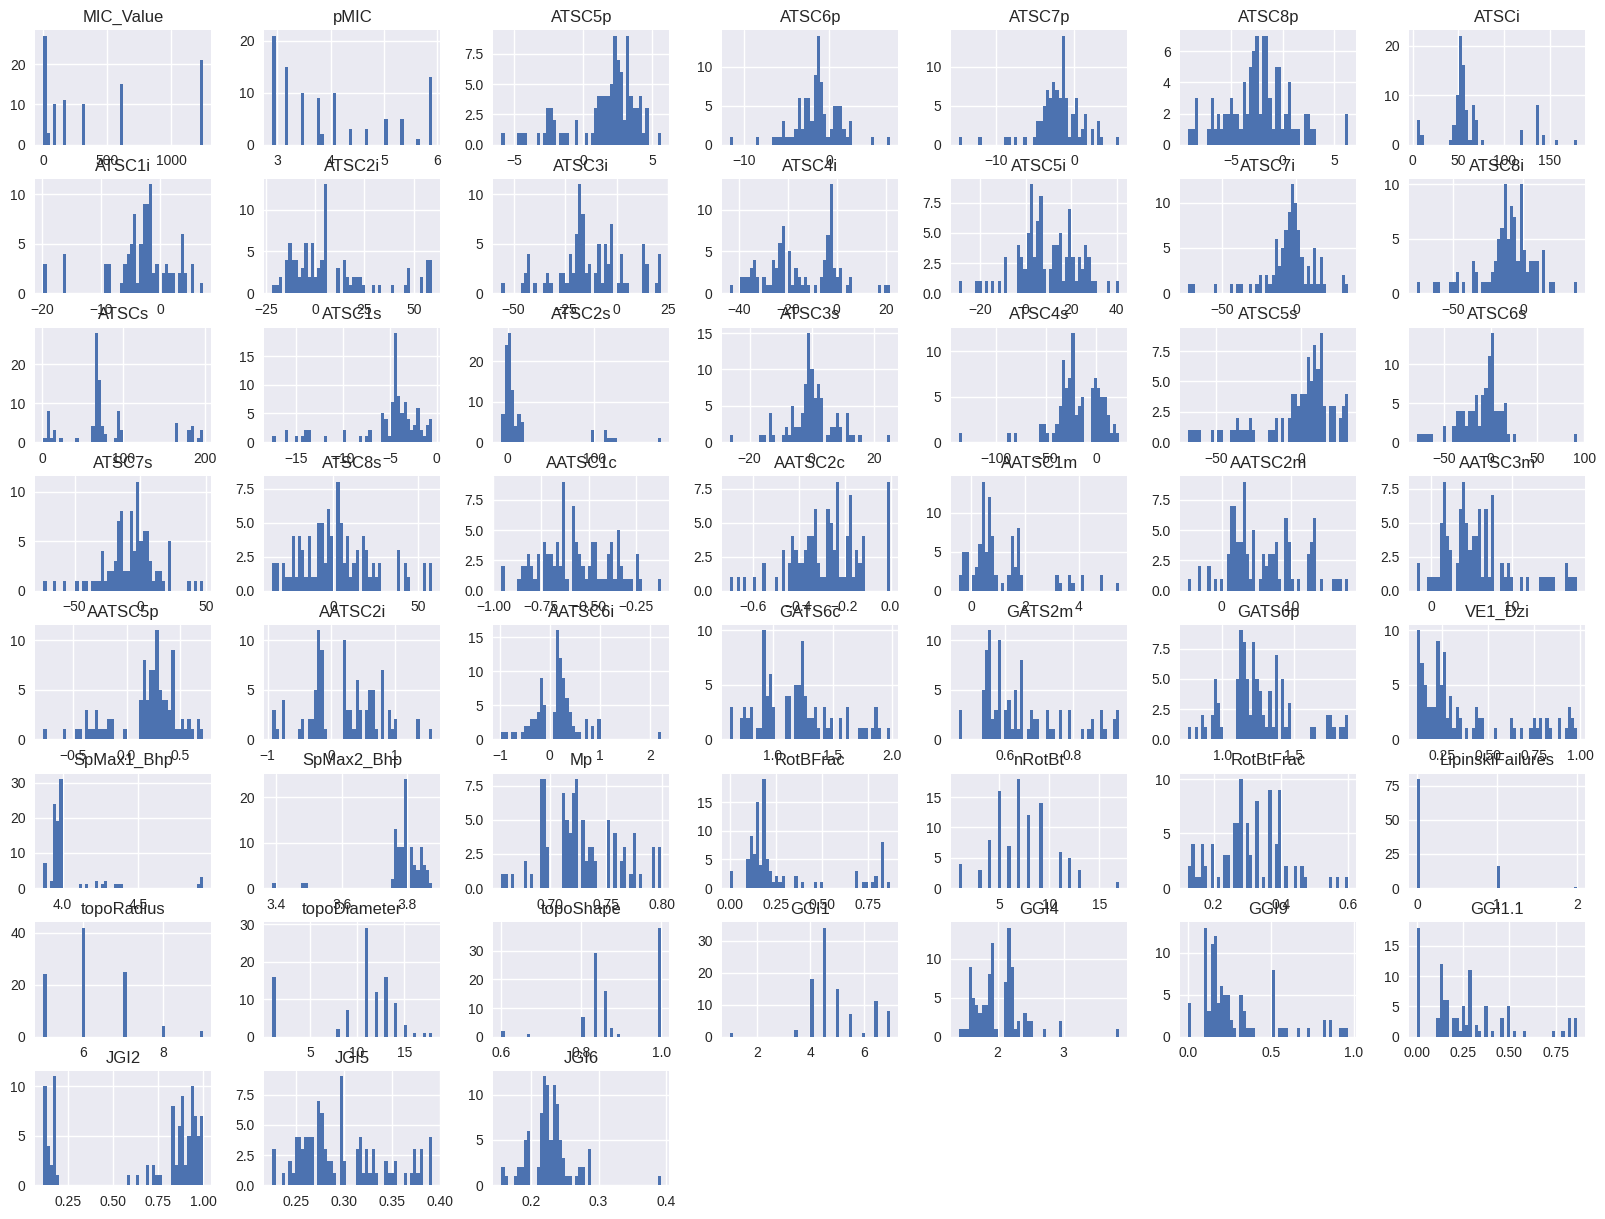

In [ ]:
df2.hist(bins = 50, figsize=(20,15))
plt.show()

**Initiation of Decission Tree Regressor**

In [ ]:
model = DecisionTreeRegressor(random_state=seed)

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[5.31158018 2.90308999 3.50514998 4.10723777 3.20411998 5.01055018
 5.01055018 2.90308999 4.10723777 2.90308999 5.91364017 3.20411998
 4.10723777 3.20411998 3.80631897 2.90308999 2.90308999 3.80617997
 4.10723777 5.91364017 4.70929776 5.31158018 2.90308999 3.80617997
 5.91364017 3.80617997 3.80617997 2.90308999 3.50514998 2.90308999
 5.61261017 4.10723777 3.20411998 5.01055018 5.91364017 2.90308999
 3.80617997 3.20411998 4.10723777 3.50514998 5.31158018 3.35463498
 3.20411998 3.50514998 3.50514998 2.90308999 2.90308999 5.31158018
 4.70929776 5.91364017 4.10723777 3.20411998 2.90308999 2.90308999
 3.20411998 3.80617997 5.91364017 4.40826776 2.90308999 5.91364017
 3.20411998 3.20411998 2.90308999 5.01055018 5.91364017 3.80631897
 3.50514998 3.20411998 5.91364017 3.20411998 3.20411998 2.90308999
 3.50514998 3.80548566 4.40826776 5.91364017 3.35463498]


In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

,Y_train,Y_train_pred
49,5.311580,5.311580
70,2.903090,2.903090
68,3.505150,3.505150
15,4.107238,4.107238
39,3.204120,3.204120
...,...,...
60,3.505150,3.505150
71,3.805486,3.805486
14,4.408268,4.408268
92,5.913640,5.913640


In [ ]:
len(Y_train_pred)

77

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 0.9994


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.0039


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.0243


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 0.9994


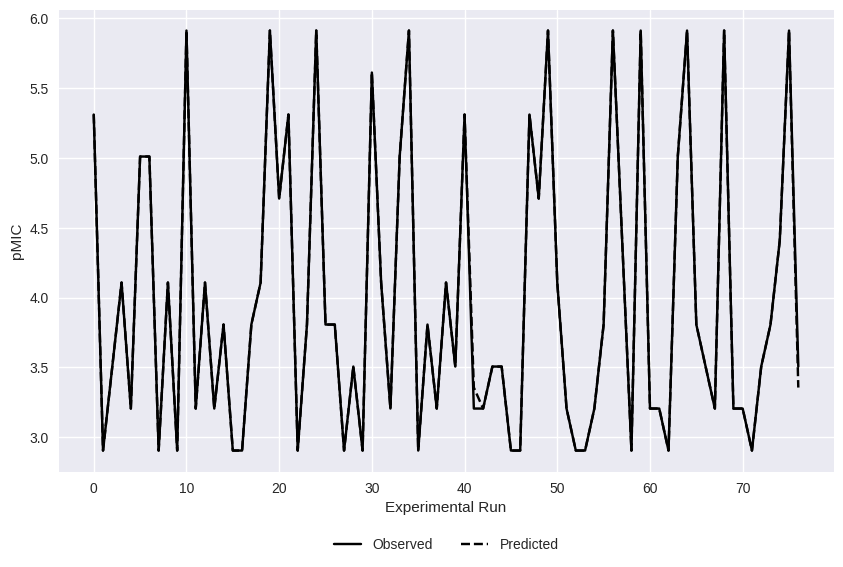

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pMIC')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([5.01055018, 4.70929776, 5.91364017, 3.20411998, 3.20411998,
       4.70929776, 3.20411998, 5.91364017, 2.90308999, 2.90308999,
       2.90308999, 5.91364017, 2.90308999, 3.20411998, 5.01055018,
       5.61261017, 2.90308999, 5.91364017, 3.20411998, 5.91364017])

In [ ]:
len(Y_test_pred)

20

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
62,4.107238,5.010550
40,4.709298,4.709298
93,5.913640,5.913640
18,5.913640,3.204120
81,2.903090,3.204120
83,2.903090,4.709298
64,2.903090,3.204120
42,3.505150,5.913640
10,2.903090,2.903090
0,5.311580,2.903090


In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: -0.8865


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: -0.8865


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 1.0386


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 1.4233


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))

The EVS is: -0.8609


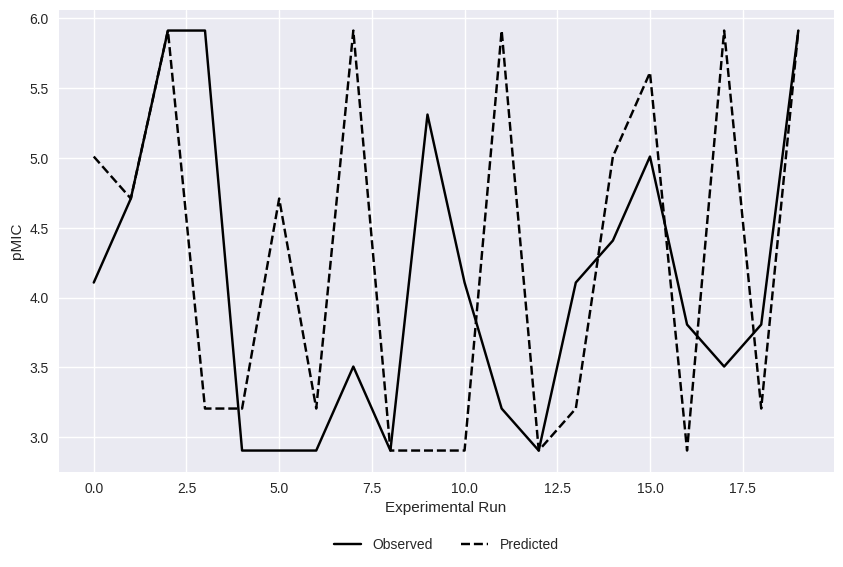

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pMIC')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

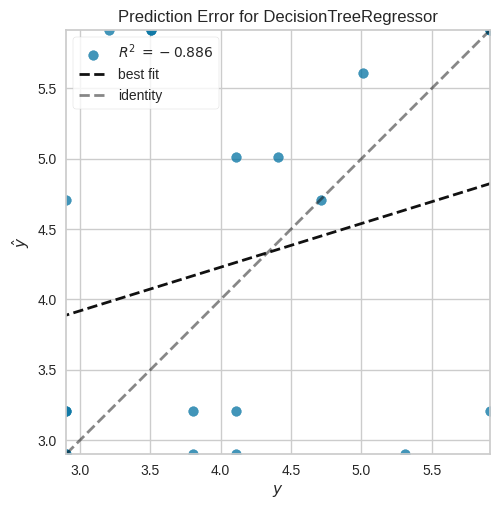

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

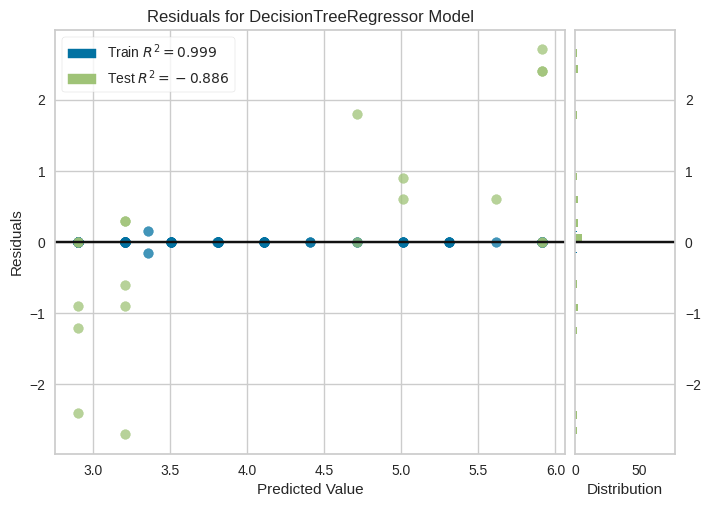

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

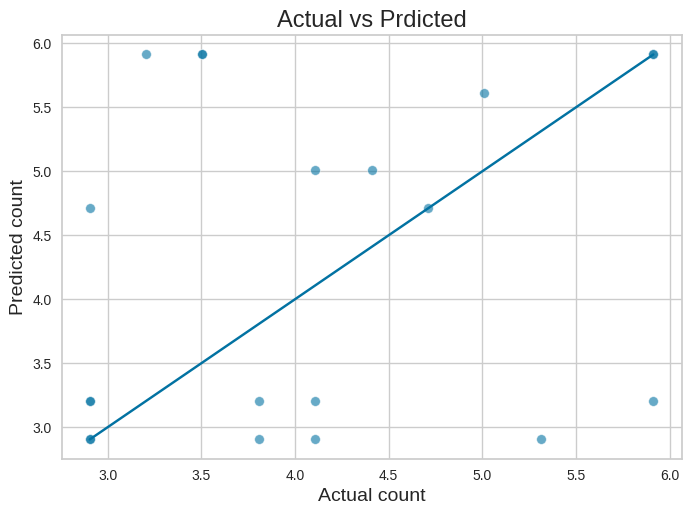

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Prdicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

-0.8864709522677601

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

1.42

**Selecting Hyperparmeters**

In [ ]:
my_param_grid = {'max_depth':[4,5,6], 'min_samples_split':[4,5,6], 'min_samples_leaf': [1,1,1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=DecisionTreeRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6], 'min_samples_leaf': [1, 1, 1],
                         'min_samples_split': [4, 5, 6]},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=-0.330 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.252 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.239 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.169 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=-0.586 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=-0.330 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=0.575 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=0.245 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=0.168 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6], 'min_samples_leaf': [1, 1, 1],
                         'min_samples_split': [4, 5, 6]},
             verbose=3)

In [ ]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

**Test with Hyperparameters**

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([5.16106518, 3.77608531, 5.91364017, 3.80619387, 3.23422854,
       3.77608531, 3.80619387, 5.91364017, 3.23422854, 3.02350199,
       3.02350199, 5.83838267, 3.23422854, 3.02350199, 5.16106518,
       5.83838267, 3.23422854, 5.91364017, 3.23422854, 5.83838267])

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
62,4.107238,5.010550,5.161065
40,4.709298,4.709298,3.776085
93,5.913640,5.913640,5.913640
18,5.913640,3.204120,3.806194
81,2.903090,3.204120,3.234229


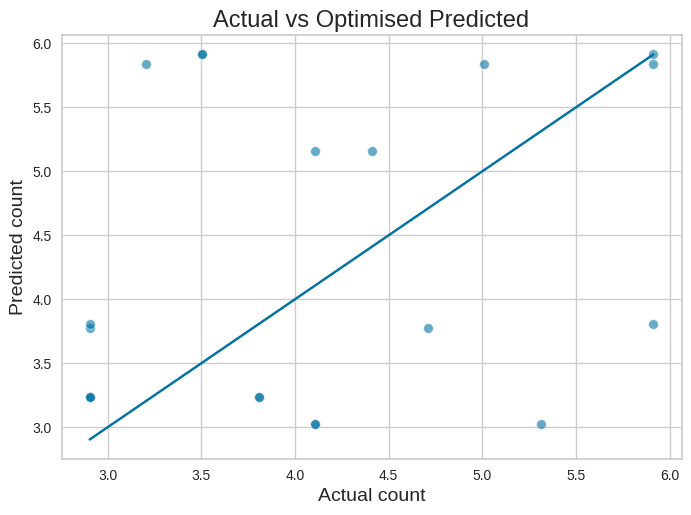

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
grid.score(X_test, Y_test)

-0.6933580482767727

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

1.35

In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The testing r_sq is: 0.8940


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 1.0785


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 1.3485


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: -0.6535


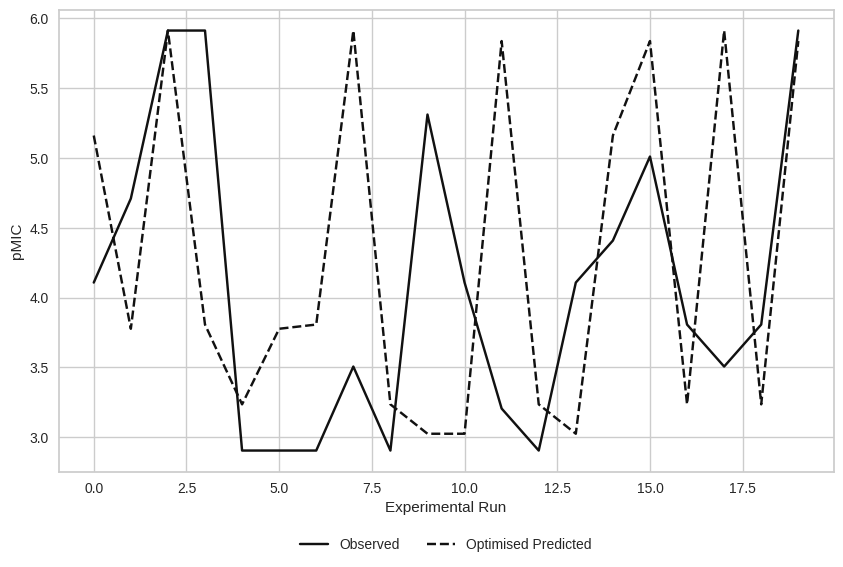

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pMIC')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

**Train with Hyperparameters**

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([5.16106518, 3.02350199, 3.23422854, 3.70585517, 3.23422854,
       5.01055018, 4.91013271, 3.23422854, 3.23422854, 3.23422854,
       5.91364017, 3.77608531, 3.95677837, 3.80619387, 3.23422854,
       3.23422854, 3.23422854, 3.23422854, 3.70585517, 5.83838267,
       3.77608531, 5.31158018, 3.02350199, 3.77608531, 5.91364017,
       3.23422854, 3.77608531, 3.70585517, 3.23422854, 3.23422854,
       5.83838267, 3.86625823, 3.02350199, 4.91013271, 5.83838267,
       3.23422854, 3.23422854, 3.02350199, 3.77608531, 3.23422854,
       5.31158018, 3.23422854, 3.23422854, 3.77608531, 3.86625823,
       3.23422854, 3.23422854, 5.31158018, 4.91013271, 5.83838267,
       3.86625823, 3.23422854, 3.23422854, 3.23422854, 3.77608531,
       3.86625823, 5.91364017, 3.77608531, 3.23422854, 5.91364017,
       3.23422854, 3.23422854, 3.02350199, 5.16106518, 5.91364017,
       3.95677837, 3.77608531, 3.23422854, 5.91364017, 3.23422854,
       3.23422854, 3.23422854, 3.77608531, 3.86625823, 3.80619

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

,Y_train,Y_train_pred,Y_train_optimised
49,5.311580,5.311580,5.161065
70,2.903090,2.903090,3.023502
68,3.505150,3.505150,3.234229
15,4.107238,4.107238,3.705855
39,3.204120,3.204120,3.234229


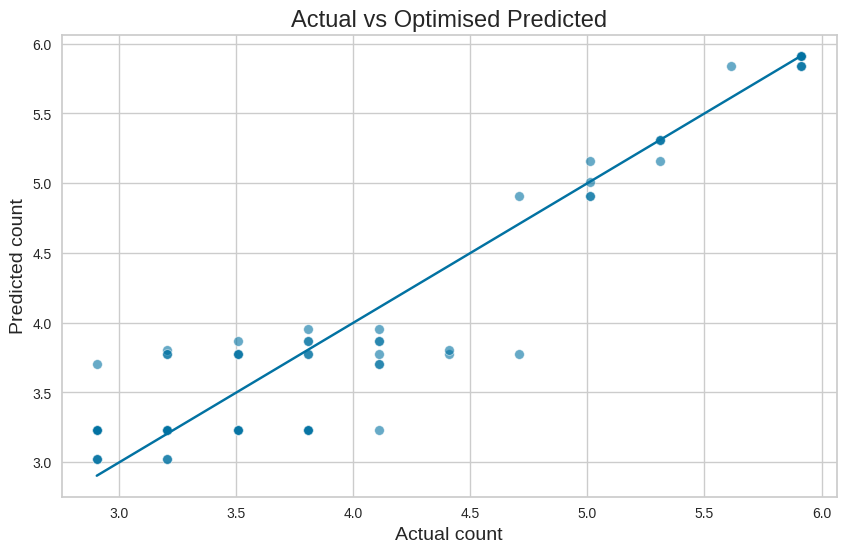

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.8892


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.2384


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.3267


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.8998


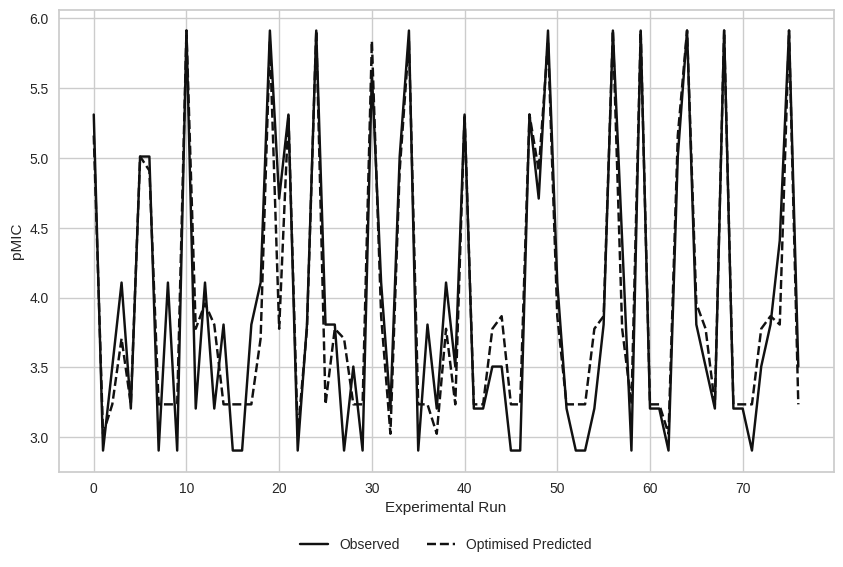

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pMIC')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

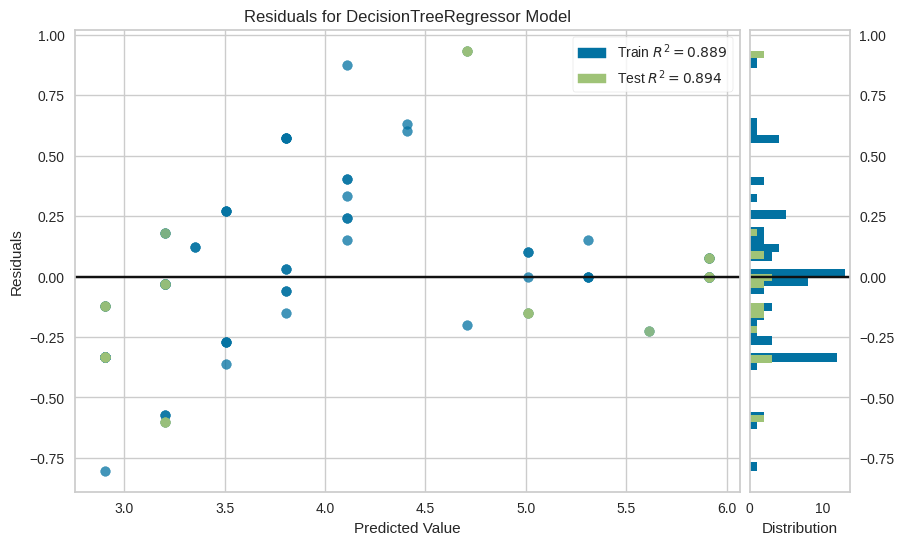

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train_optimised)
visualizer.score(X_test, Y_test_optimised)
visualizer.poof()

In [ ]:
features = list(X_train.columns)

In [ ]:
features

['ATSC5p',
 'ATSC6p',
 'ATSC7p',
 'ATSC8p',
 'ATSCi',
 'ATSC1i',
 'ATSC2i',
 'ATSC3i',
 'ATSC4i',
 'ATSC5i',
 'ATSC7i',
 'ATSC8i',
 'ATSCs',
 'ATSC1s',
 'ATSC2s',
 'ATSC3s',
 'ATSC4s',
 'ATSC5s',
 'ATSC6s',
 'ATSC7s',
 'ATSC8s',
 'AATSC1c',
 'AATSC2c',
 'AATSC1m',
 'AATSC2m',
 'AATSC3m',
 'AATSC5p',
 'AATSC2i',
 'AATSC6i',
 'GATS6c',
 'GATS2m',
 'GATS6p',
 'VE1_Dzi',
 'SpMax1_Bhp',
 'SpMax2_Bhp',
 'Mp',
 'RotBFrac',
 'nRotBt',
 'RotBtFrac',
 'LipinskiFailures',
 'topoRadius',
 'topoDiameter',
 'topoShape',
 'GGI1',
 'GGI4',
 'GGI9',
 'GGI1.1',
 'JGI2',
 'JGI5',
 'JGI6']

In [ ]:
RFR = DecisionTreeRegressor(random_state=seed, max_depth = 8, min_samples_leaf= 7, min_samples_split= 7)

In [ ]:
RFR.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=7, min_samples_split=7,
                      random_state=42)

In [ ]:
importance = RFR.feature_importances_
importance

array([0.        , 0.        , 0.        , 0.        , 0.00671444,
       0.        , 0.        , 0.        , 0.        , 0.46090934,
       0.        , 0.        , 0.        , 0.19997212, 0.        ,
       0.15015721, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06137549,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08540128, 0.        ,
       0.        , 0.        , 0.        , 0.03547013, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

,features,feature_importances
0,ATSC5p,0.000000
1,ATSC6p,0.000000
2,ATSC7p,0.000000
3,ATSC8p,0.000000
4,ATSCi,0.006714
5,ATSC1i,0.000000
6,ATSC2i,0.000000
7,ATSC3i,0.000000
8,ATSC4i,0.000000
9,ATSC5i,0.460909


<Figure size 8000x4800 with 0 Axes>

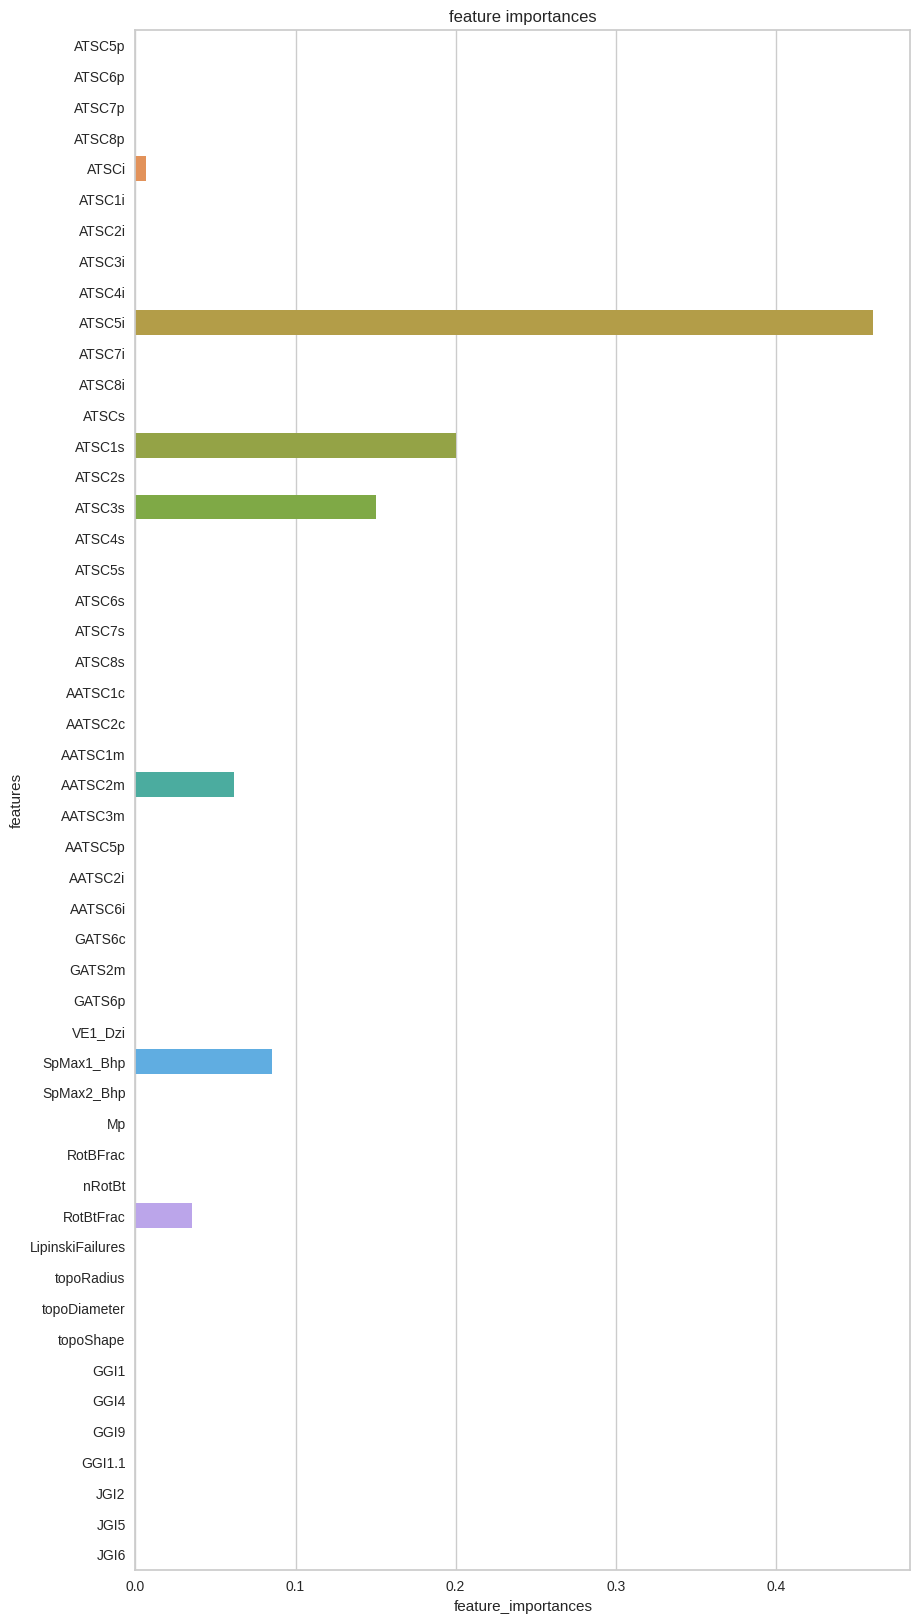

In [ ]:
fig = plt.figure(dpi=800)
plt.figure(figsize=(10,20))
plt.title('feature importances')
sns.barplot(y='features', x='feature_importances', data=FIM)
plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.8 MB/s eta 0:00:00


In [ ]:
import shap
X = df2.drop(['pMIC'],axis = 1)
explainer = shap.TreeExplainer(model,feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X)

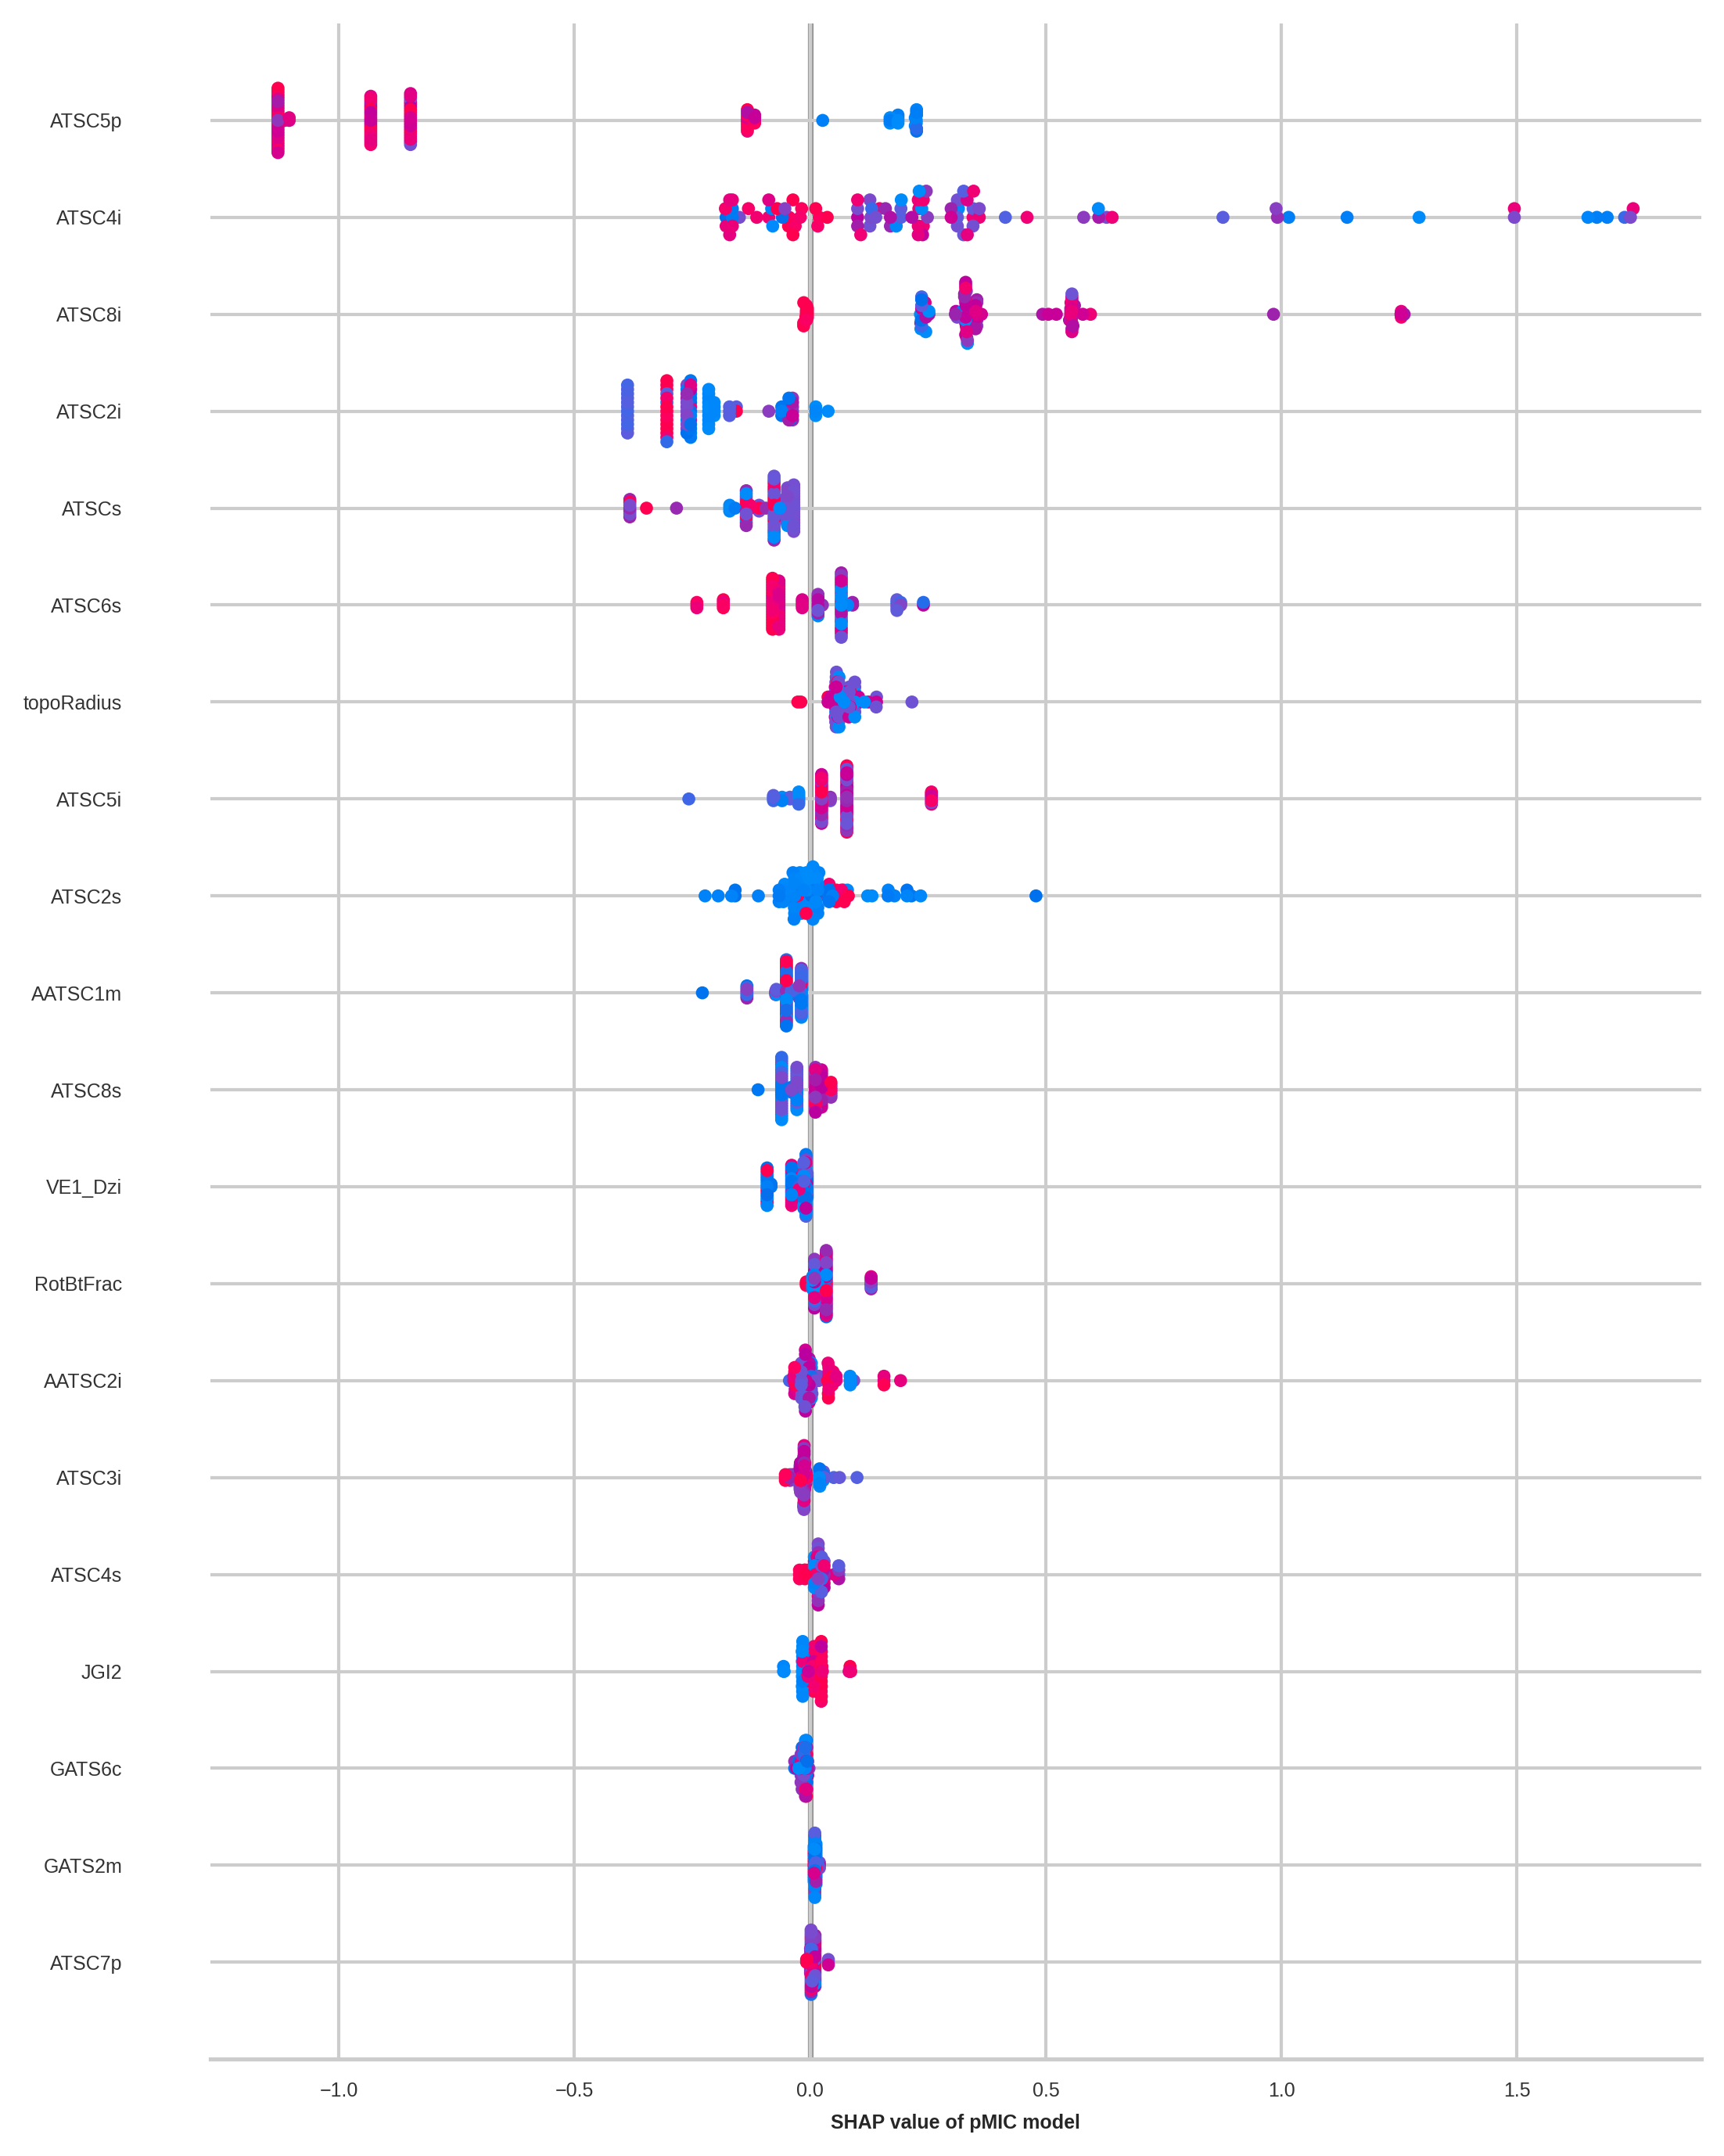

In [ ]:
plt.figure(dpi=300)
shap.summary_plot(shap_values, X,show=False,color_bar=False)
plt.xlabel("SHAP value of pMIC model" ,fontweight='bold',fontsize=6)
plt.tick_params(labelsize=6,)
plt.show()